In [ ]:
#import packages
import pandas as pd 
import numpy as np
import re 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
from pandas.tseries import offsets
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
%matplotlib inline

[nltk_data] Downloading package punkt to C:\Users\Spencer
[nltk_data]     Franklin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Load Dataframe 
df = pd.read_csv('President speeches.csv', encoding = "ISO-8859-1")
df.head()

,Date,Speaker,text
0,12/06/1897,William Mckinley,It gives me pleasure to extend greeting to the...
1,12/06/1897,William Mckinley,A matter of genuine satisfaction is the growin...
2,12/06/1897,William Mckinley,The extra session of this Congress which close...
3,12/06/1897,William Mckinley,Tariff legislation having been settled by the ...
4,12/06/1897,William Mckinley,The work of putting our finances upon a sound ...


In [ ]:
#Make new column with dates using datetime object 
df["New Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Speaker,text,New Date
0,12/06/1897,William Mckinley,It gives me pleasure to extend greeting to the...,1897-12-06
1,12/06/1897,William Mckinley,A matter of genuine satisfaction is the growin...,1897-12-06
2,12/06/1897,William Mckinley,The extra session of this Congress which close...,1897-12-06
3,12/06/1897,William Mckinley,Tariff legislation having been settled by the ...,1897-12-06
4,12/06/1897,William Mckinley,The work of putting our finances upon a sound ...,1897-12-06


In [ ]:
df['New_speeches'] = df['text'].str.lower()
df['New_speeches'] = df['New_speeches'].str.replace('[^\w\s]','')
df['New_speeches'] = df['New_speeches'].str.replace('\d+', '')
df.head()

,Date,Speaker,text,New Date,New_speeches
0,12/06/1897,William Mckinley,It gives me pleasure to extend greeting to the...,1897-12-06,it gives me pleasure to extend greeting to the...
1,12/06/1897,William Mckinley,A matter of genuine satisfaction is the growin...,1897-12-06,a matter of genuine satisfaction is the growin...
2,12/06/1897,William Mckinley,The extra session of this Congress which close...,1897-12-06,the extra session of this congress which close...
3,12/06/1897,William Mckinley,Tariff legislation having been settled by the ...,1897-12-06,tariff legislation having been settled by the ...
4,12/06/1897,William Mckinley,The work of putting our finances upon a sound ...,1897-12-06,the work of putting our finances upon a sound ...


In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

df['New_speeches'].apply(lemmatize_text)
df.head()

,Date,Speaker,text,New Date,New_speeches
0,12/06/1897,William Mckinley,It gives me pleasure to extend greeting to the...,1897-12-06,it gives me pleasure to extend greeting to the...
1,12/06/1897,William Mckinley,A matter of genuine satisfaction is the growin...,1897-12-06,a matter of genuine satisfaction is the growin...
2,12/06/1897,William Mckinley,The extra session of this Congress which close...,1897-12-06,the extra session of this congress which close...
3,12/06/1897,William Mckinley,Tariff legislation having been settled by the ...,1897-12-06,tariff legislation having been settled by the ...
4,12/06/1897,William Mckinley,The work of putting our finances upon a sound ...,1897-12-06,the work of putting our finances upon a sound ...


In [ ]:
sw = set(stopwords.words("english"))
stemmer = PorterStemmer()

def generate_tokens(Speeches):
    new_Speeches = re.sub("[^A-Za-z]"," ", Speeches)
    tokens = new_Speeches.lower().split()
    tokens = [el for el in tokens if el not in sw]
    tokens = [stemmer.stem(el) for el in tokens]
    return " ".join(tokens).split()

df["clean_tokens"] = df["text"].apply(generate_tokens)
df.head()

,Date,Speaker,text,New Date,New_speeches,clean_tokens
0,12/06/1897,William Mckinley,It gives me pleasure to extend greeting to the...,1897-12-06,it gives me pleasure to extend greeting to the...,"[give, pleasur, extend, greet, fifti, fifth, c..."
1,12/06/1897,William Mckinley,A matter of genuine satisfaction is the growin...,1897-12-06,a matter of genuine satisfaction is the growin...,"[matter, genuin, satisfact, grow, feel, frater..."
2,12/06/1897,William Mckinley,The extra session of this Congress which close...,1897-12-06,the extra session of this congress which close...,"[extra, session, congress, close, juli, last, ..."
3,12/06/1897,William Mckinley,Tariff legislation having been settled by the ...,1897-12-06,tariff legislation having been settled by the ...,"[tariff, legisl, settl, extra, session, congre..."
4,12/06/1897,William Mckinley,The work of putting our finances upon a sound ...,1897-12-06,the work of putting our finances upon a sound ...,"[work, put, financ, upon, sound, basi, difficu..."


In [ ]:
debate_tokens = df.clean_tokens.values
common_dictionary= Dictionary(debate_tokens)
common_corpus= [common_dictionary.doc2bow(text) for text in debate_tokens]

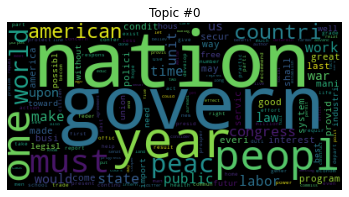

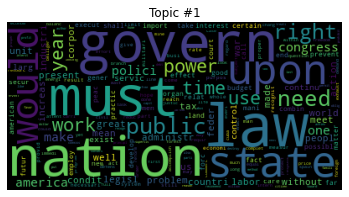

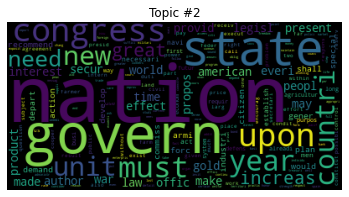

In [ ]:
lda = LdaModel(common_corpus, num_topics = 3, 
              id2word = common_dictionary, passes = 5,
              random_state = 1234)
for t in range(lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t,200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic_"+ str(t)+".png")

In [ ]:
df_pres= df.groupby(['New Date']).clean_tokens.agg(sum).reset_index()
df_pres.head()

,New Date,clean_tokens
0,1897-12-06,"[give, pleasur, extend, greet, fifti, fifth, c..."
1,1903-12-07,"[nation, greater, resourc, think, truth, said,..."
2,1913-12-02,"[pursuanc, constitut, duti, give, congress, in..."
3,1921-12-06,"[gratifi, privileg, come, congress, republ, pe..."
4,1937-01-02,"[first, time, nation, histori, presid, deliv, ..."


In [ ]:
df_pres_agg = df_pres.clean_tokens.values
common_dictionary_agg = Dictionary(df_pres_agg)
common_corpus_agg = [common_dictionary.doc2bow(text) for text in df_pres_agg]

In [ ]:
topic_props = [lda.get_document_topics(doc,minimum_probability=0) for doc in common_corpus_agg]
topic_props_df = pd.DataFrame(topic_props)
topic_props_df.head()

,0,1,2
0,"(0, 0.18961082)","(1, 0.21412002)","(2, 0.5962692)"
1,"(0, 0.33898365)","(1, 0.43234926)","(2, 0.22866711)"
2,"(0, 0.7493331)","(1, 0.050975278)","(2, 0.19969165)"
3,"(0, 0.42755976)","(1, 0.36413044)","(2, 0.2083098)"
4,"(0, 0.6351262)","(1, 0.16619739)","(2, 0.19867647)"


In [ ]:
for each in topic_props_df.columns:
    df_pres[each] = topic_props_df[each].apply(lambda x: x[1])
df_pres.head(10)

,New Date,clean_tokens,0,1,2
0,1897-12-06,"[give, pleasur, extend, greet, fifti, fifth, c...",0.189611,0.214120,0.596269
1,1903-12-07,"[nation, greater, resourc, think, truth, said,...",0.338984,0.432349,0.228667
2,1913-12-02,"[pursuanc, constitut, duti, give, congress, in...",0.749333,0.050975,0.199692
3,1921-12-06,"[gratifi, privileg, come, congress, republ, pe...",0.427560,0.364130,0.208310
4,1937-01-02,"[first, time, nation, histori, presid, deliv, ...",0.635126,0.166197,0.198676
5,1947-01-06,"[look, like, good, mani, move, left, sinc, las...",0.477363,0.305710,0.216926
6,1953-02-02,"[welcom, honor, appear, deliv, first, messag, ...",0.348471,0.327621,0.323908
7,1961-01-30,"[pleasur, return, whenc, came, among, oldest, ...",0.386281,0.310582,0.303137
8,1974-01-30,"[meet, tonight, time, great, challeng, great, ...",0.661425,0.205817,0.132759
9,1986-02-04,"[thank, allow, delay, address, even, paus, tog...",0.633752,0.356881,0.009367


In [ ]:
topic model=df_pres.to_csv('topic model.csv', header= True, index= True)

In [ ]:
print("From these findings we see that the speeches in topic 1 become very prevalent around 1910's. Compare that to topic 3 we see that topic get less prevalent over time.")

From these findings we see that the speeches in topic 1 become very prevalent around 1910's. Compare that to topic 3 we see that topic get less prevalent over time.


In [ ]:
debate_tokens1 = df.clean_tokens.values
common_dictionary1= Dictionary(debate_tokens1)
common_corpus1= [common_dictionary1.doc2bow(text) for text in debate_tokens1]

C:\Users\Spencer Franklin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


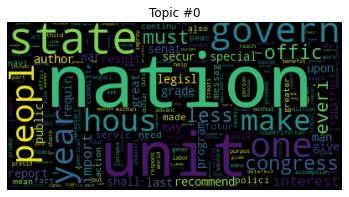

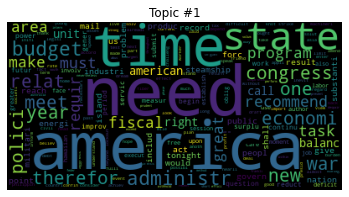

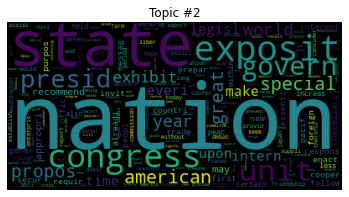

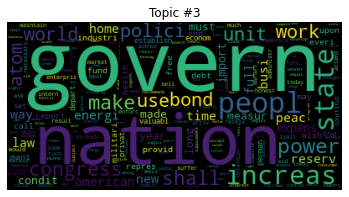

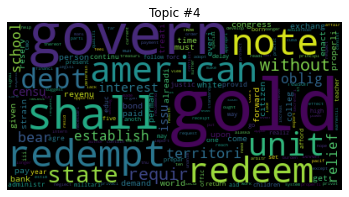

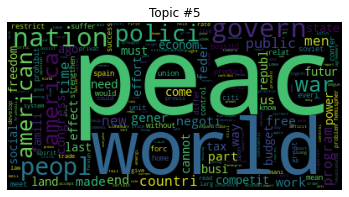

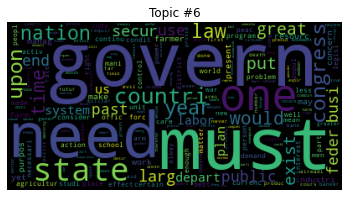

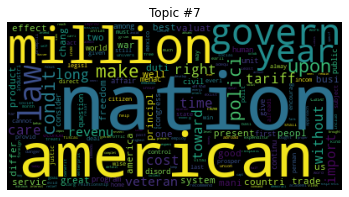

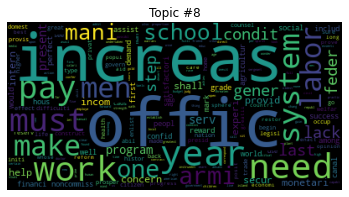

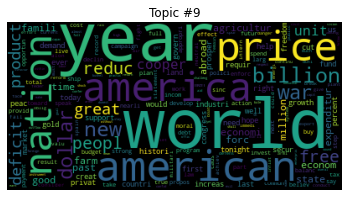

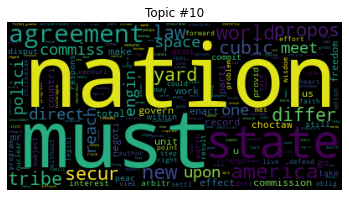

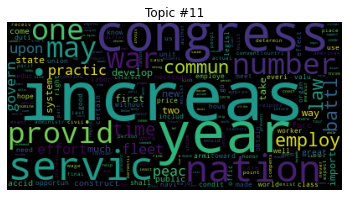

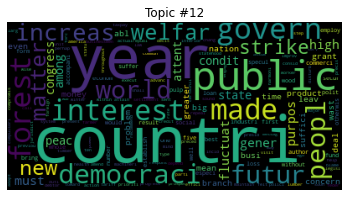

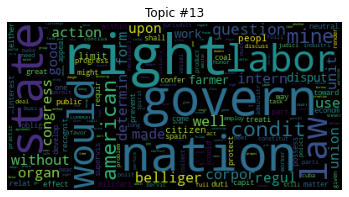

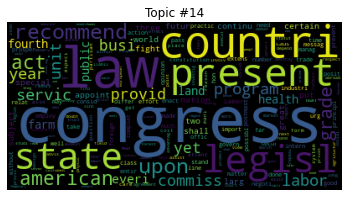

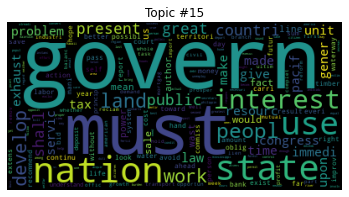

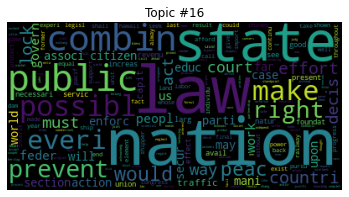

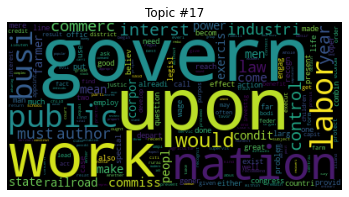

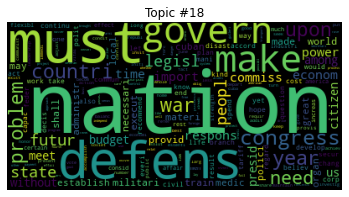

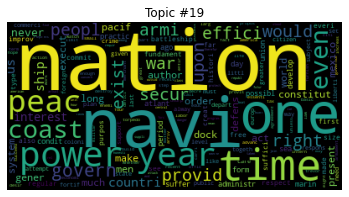

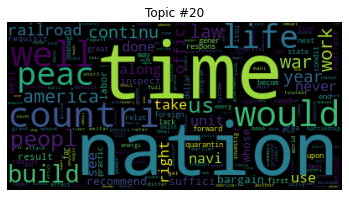

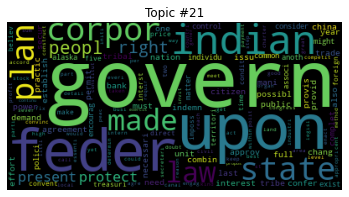

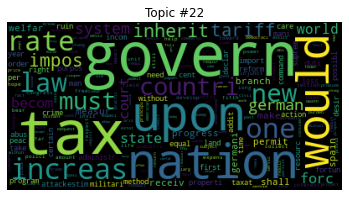

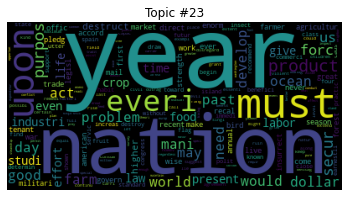

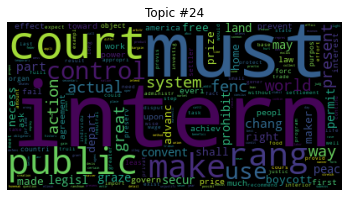

In [ ]:
lda1 = LdaModel(common_corpus1, num_topics = 25, 
              id2word = common_dictionary1, passes = 5,
              random_state = 1234)
for t in range(lda1.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda1.show_topic(t,200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic_"+ str(t)+".png")

In [ ]:
df_pres1 = df.groupby(['New Date']).clean_tokens.agg(sum).reset_index()
df_pres1.head()

,New Date,clean_tokens
0,1897-12-06,"[give, pleasur, extend, greet, fifti, fifth, c..."
1,1903-12-07,"[nation, greater, resourc, think, truth, said,..."
2,1913-12-02,"[pursuanc, constitut, duti, give, congress, in..."
3,1921-12-06,"[gratifi, privileg, come, congress, republ, pe..."
4,1937-01-02,"[first, time, nation, histori, presid, deliv, ..."


In [ ]:
df_pres_agg1 = df_pres1.clean_tokens.values
common_dictionary_agg1 = Dictionary(df_pres_agg1)
common_corpus_agg1 = [common_dictionary1.doc2bow(text) for text in df_pres_agg1]

In [ ]:
topic_props1 = [lda1.get_document_topics(doc,minimum_probability=0) for doc in common_corpus_agg1]
topic_props_df1 = pd.DataFrame(topic_props1)
topic_props_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,"(0, 0.11870306)","(1, 0.011931293)","(2, 0.022539224)","(3, 0.012588872)","(4, 0.049287274)","(5, 0.012725134)","(6, 0.06127949)","(7, 0.024567276)","(8, 6.7898363e-06)","(9, 0.0077209356)",...,"(15, 0.12530139)","(16, 0.01572417)","(17, 0.035919912)","(18, 0.06016791)","(19, 0.051496416)","(20, 0.0026028205)","(21, 0.04906203)","(22, 0.06445207)","(23, 0.019871002)","(24, 6.7898363e-06)"
1,"(0, 0.06398554)","(1, 0.0009893402)","(2, 0.010854321)","(3, 0.012404287)","(4, 0.00061103073)","(5, 0.016961237)","(6, 0.1031224)","(7, 0.017026355)","(8, 0.00939261)","(9, 0.002147254)",...,"(15, 0.1073734)","(16, 0.02854499)","(17, 0.2108531)","(18, 0.020112976)","(19, 0.060019977)","(20, 0.0018074344)","(21, 0.041500237)","(22, 0.045871038)","(23, 0.02541684)","(24, 0.023420766)"
2,"(0, 0.1218532)","(1, 2.464388e-05)","(2, 2.464388e-05)","(3, 0.07219697)","(4, 2.464388e-05)","(5, 0.00500942)","(6, 0.21546176)","(7, 0.0011978677)","(8, 0.018098839)","(9, 2.464388e-05)",...,"(15, 0.082876675)","(16, 0.011089734)","(17, 0.1298181)","(18, 0.010223578)","(19, 0.09554487)","(20, 2.464388e-05)","(21, 2.464388e-05)","(22, 0.0011854047)","(23, 0.06384783)","(24, 2.464388e-05)"
3,"(0, 0.07048775)","(1, 0.023436708)","(2, 0.040941283)","(3, 0.09876414)","(4, 0.0031495895)","(5, 0.041197132)","(6, 0.08537388)","(7, 0.10053751)","(8, 0.002680231)","(9, 0.031148802)",...,"(15, 0.10447689)","(16, 0.0075436053)","(17, 0.09632124)","(18, 0.072893605)","(19, 0.023882614)","(20, 0.0026767028)","(21, 1.4463081e-05)","(22, 0.0032746382)","(23, 0.0050064675)","(24, 1.4463081e-05)"
4,"(0, 0.041797258)","(1, 0.010854273)","(2, 0.034782566)","(3, 0.0043483274)","(4, 2.869863e-05)","(5, 0.09808802)","(6, 0.118097946)","(7, 0.0039398475)","(8, 2.869863e-05)","(9, 2.869863e-05)",...,"(15, 0.15131071)","(16, 2.869863e-05)","(17, 0.13946939)","(18, 0.06044634)","(19, 0.0114649935)","(20, 2.869863e-05)","(21, 2.869863e-05)","(22, 0.042766362)","(23, 0.037744585)","(24, 2.869863e-05)"


In [ ]:
for each in topic_props_df1.columns:
    df_pres1[each] = topic_props_df1[each].apply(lambda x: x[1])
df_pres1.head(10)

,New Date,clean_tokens,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,1897-12-06,"[give, pleasur, extend, greet, fifti, fifth, c...",0.118703,0.011931,0.022539,0.012589,0.049287,0.012725,0.061279,0.024567,...,0.125301,0.015724,0.035920,0.060168,0.051496,0.002603,0.049062,0.064452,0.019871,0.000007
1,1903-12-07,"[nation, greater, resourc, think, truth, said,...",0.063986,0.000989,0.010854,0.012404,0.000611,0.016961,0.103122,0.017026,...,0.107373,0.028545,0.210853,0.020113,0.060020,0.001807,0.041500,0.045871,0.025417,0.023421
2,1913-12-02,"[pursuanc, constitut, duti, give, congress, in...",0.121853,0.000025,0.000025,0.072197,0.000025,0.005009,0.215462,0.001198,...,0.082877,0.011090,0.129818,0.010224,0.095545,0.000025,0.000025,0.001185,0.063848,0.000025
3,1921-12-06,"[gratifi, privileg, come, congress, republ, pe...",0.070488,0.023437,0.040941,0.098764,0.003150,0.041197,0.085374,0.100538,...,0.104477,0.007544,0.096321,0.072894,0.023883,0.002677,0.000014,0.003275,0.005006,0.000014
4,1937-01-02,"[first, time, nation, histori, presid, deliv, ...",0.041797,0.010854,0.034783,0.004348,0.000029,0.098088,0.118098,0.003940,...,0.151311,0.000029,0.139469,0.060446,0.011465,0.000029,0.000029,0.042766,0.037745,0.000029
5,1947-01-06,"[look, like, good, mani, move, left, sinc, las...",0.089544,0.017045,0.002079,0.059760,0.000013,0.056352,0.098086,0.028648,...,0.039562,0.000013,0.053405,0.119789,0.004217,0.001718,0.006756,0.009576,0.000816,0.012038
6,1953-02-02,"[welcom, honor, appear, deliv, first, messag, ...",0.091116,0.052737,0.023590,0.021746,0.002020,0.042683,0.207532,0.030214,...,0.069712,0.017435,0.032797,0.142542,0.024921,0.000011,0.015237,0.027560,0.001480,0.003426
7,1961-01-30,"[pleasur, return, whenc, came, among, oldest, ...",0.040214,0.047004,0.024564,0.022788,0.018873,0.148047,0.039500,0.034042,...,0.076422,0.033593,0.018634,0.182364,0.000014,0.017685,0.000014,0.034653,0.024607,0.012873
8,1974-01-30,"[meet, tonight, time, great, challeng, great, ...",0.104356,0.091164,0.056671,0.025821,0.001344,0.145251,0.117738,0.002582,...,0.004911,0.005148,0.001591,0.100091,0.037683,0.013582,0.000017,0.009588,0.012099,0.000876
9,1986-02-04,"[thank, allow, delay, address, even, paus, tog...",0.047397,0.042114,0.000022,0.000022,0.009461,0.312807,0.033393,0.045413,...,0.021933,0.013102,0.042636,0.052783,0.032928,0.025871,0.017832,0.000022,0.000022,0.000022


In [ ]:
print("The distribution of topics is more dispersed and some topics probability is so small they do not even register.")

The distribution of topics is more dispersed 


In [ ]:
topic_model1= df_pres1.to_csv('topic model.csv', header= True, index= True)

In [ ]:
new_doc="Mitch McConnell is blocking bipartisan aid. Any characterization of this situation as “Congress at an impasse” is a lie. There is a bipartisan, bicameral agreement. The President even wants something. The problem is McConnell.  He’s blocking the deal."
new_doc = new_doc.split()
new_doc_bow = common_dictionary_agg1.doc2bow(new_doc)
lda1.get_document_topics(new_doc_bow)

[(0, 0.010017839),
 (1, 0.010017839),
 (2, 0.010017839),
 (3, 0.010017839),
 (4, 0.010017839),
 (5, 0.010017839),
 (6, 0.010017839),
 (7, 0.010017839),
 (8, 0.010017839),
 (9, 0.2599698),
 (10, 0.010017839),
 (11, 0.010017839),
 (12, 0.010017839),
 (13, 0.25975186),
 (14, 0.010017839),
 (15, 0.010017839),
 (16, 0.010017839),
 (17, 0.010017839),
 (18, 0.010017839),
 (19, 0.2598859),
 (20, 0.010017839),
 (21, 0.010017839),
 (22, 0.010017839),
 (23, 0.010017839),
 (24, 0.010017839)]

In [ ]:
new_doc1= "Tremendous support from all over the Country. All we ask is COURAGE & WISDOM from those that will be making one of the most important decisions in our Country’s history. God bless you!"
new_doc1 = new_doc1.split()
new_doc_bow1 = common_dictionary_agg1.doc2bow(new_doc1)
lda1.get_document_topics(new_doc_bow1)

[(11, 0.14770934), (17, 0.14887619), (18, 0.43460485), (22, 0.14861229)]

In [ ]:
new_doc2= "The Senate knows all about end-of-year drama, but this time the stakes could not be higher. Americans are struggling under the weight of this pandemic. Democrats need to let Congress do our job & pass more relief. We have so much common ground. Let's make law. Let's get it done."
new_doc2 = new_doc2.split()
new_doc_bow2 = common_dictionary_agg1.doc2bow(new_doc2)
lda1.get_document_topics(new_doc_bow2)

[(4, 0.053839203),
 (10, 0.1252011),
 (13, 0.3446635),
 (14, 0.081770495),
 (15, 0.10288732),
 (18, 0.14603937),
 (22, 0.09001748)]

In [ ]:
new_doc3 = "I am absolutely confident that Secretary-designate Lloyd Austin is the right person to lead the Department of Defense at this critical moment."
new_doc3 = new_doc3.split()
new_doc_bow3 = common_dictionary_agg1.doc2bow(new_doc3)
lda1.get_document_topics(new_doc_bow3)

[(0, 0.0100056445),
 (1, 0.0100056445),
 (2, 0.0100056445),
 (3, 0.0100056445),
 (4, 0.0100056445),
 (5, 0.0100056445),
 (6, 0.0100056445),
 (7, 0.0100056445),
 (8, 0.0100056445),
 (9, 0.0100056445),
 (10, 0.0100056445),
 (11, 0.0100056445),
 (12, 0.0100056445),
 (13, 0.0100056445),
 (14, 0.28340784),
 (15, 0.0100056445),
 (16, 0.0100056445),
 (17, 0.0100056445),
 (18, 0.0100056445),
 (19, 0.0100056445),
 (20, 0.0100056445),
 (21, 0.0100056445),
 (22, 0.0100056445),
 (23, 0.0100056445),
 (24, 0.48646235)]

In [ ]:
new_doc4= "Our mission is to restore economic prosperity and financial stability We’ll do that by pursuing an investment agenda to rebuild our infrastructure create better jobs advance racial equity and fight the climate crisis"
new_doc4= new_doc4.split()
new_doc_bow4= common_dictionary_agg1.doc2bow(new_doc4)
lda1.get_document_topics(new_doc_bow4)

[(0, 0.20501809), (2, 0.3014487), (18, 0.3676971)]

In [ ]:
df['New_speeches1'] = df['text'].str.lower()
df['New_speeches1'] = df['New_speeches1'].str.replace('[^\w\s]','')
df['New_speeches1'] = df['New_speeches1'].str.replace('\d+', '')
df.head()

,Date,Speaker,text,New Date,New_speeches,clean_tokens,New_speeches1
0,12/06/1897,William Mckinley,It gives me pleasure to extend greeting to the...,1897-12-06,it gives me pleasure to extend greeting to the...,"[give, pleasur, extend, greet, fifti, fifth, c...",it gives me pleasure to extend greeting to the...
1,12/06/1897,William Mckinley,A matter of genuine satisfaction is the growin...,1897-12-06,a matter of genuine satisfaction is the growin...,"[matter, genuin, satisfact, grow, feel, frater...",a matter of genuine satisfaction is the growin...
2,12/06/1897,William Mckinley,The extra session of this Congress which close...,1897-12-06,the extra session of this congress which close...,"[extra, session, congress, close, juli, last, ...",the extra session of this congress which close...
3,12/06/1897,William Mckinley,Tariff legislation having been settled by the ...,1897-12-06,tariff legislation having been settled by the ...,"[tariff, legisl, settl, extra, session, congre...",tariff legislation having been settled by the ...
4,12/06/1897,William Mckinley,The work of putting our finances upon a sound ...,1897-12-06,the work of putting our finances upon a sound ...,"[work, put, financ, upon, sound, basi, difficu...",the work of putting our finances upon a sound ...


In [ ]:
def generate_tokens(sentence_list):
    """ This function returns a list of lists of
    clean tokens"""
    final_tokens = []
    for sentence in sentence_list:
        new_text = re.sub("[^A-Za-z]"," ", sentence)
        tokens = new_text.lower().split()
        tokens = [el for el in tokens if el not in sw]
        if tokens!=[]:
            final_tokens.append(tokens)
    return final_tokens

sw = set(stopwords.words("english"))

df["sentences"] = df.New_speeches1.apply(lambda x: sent_tokenize(x))
df["new_clean_tokens"] = df.sentences.apply(generate_tokens)

df.head()

,Date,Speaker,text,New Date,New_speeches,clean_tokens,New_speeches1,sentences,new_clean_tokens
0,12/06/1897,William Mckinley,It gives me pleasure to extend greeting to the...,1897-12-06,it gives me pleasure to extend greeting to the...,"[give, pleasur, extend, greet, fifti, fifth, c...",it gives me pleasure to extend greeting to the...,[it gives me pleasure to extend greeting to th...,"[[gives, pleasure, extend, greeting, fiftyfift..."
1,12/06/1897,William Mckinley,A matter of genuine satisfaction is the growin...,1897-12-06,a matter of genuine satisfaction is the growin...,"[matter, genuin, satisfact, grow, feel, frater...",a matter of genuine satisfaction is the growin...,[a matter of genuine satisfaction is the growi...,"[[matter, genuine, satisfaction, growing, feel..."
2,12/06/1897,William Mckinley,The extra session of this Congress which close...,1897-12-06,the extra session of this congress which close...,"[extra, session, congress, close, juli, last, ...",the extra session of this congress which close...,[the extra session of this congress which clos...,"[[extra, session, congress, closed, july, last..."
3,12/06/1897,William Mckinley,Tariff legislation having been settled by the ...,1897-12-06,tariff legislation having been settled by the ...,"[tariff, legisl, settl, extra, session, congre...",tariff legislation having been settled by the ...,[tariff legislation having been settled by the...,"[[tariff, legislation, settled, extra, session..."
4,12/06/1897,William Mckinley,The work of putting our finances upon a sound ...,1897-12-06,the work of putting our finances upon a sound ...,"[work, put, financ, upon, sound, basi, difficu...",the work of putting our finances upon a sound ...,[the work of putting our finances upon a sound...,"[[work, putting, finances, upon, sound, basis,..."


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(df["new_clean_tokens"].sum(), size=300, sg=1,window=5, min_count=1, seed=1234)

In [ ]:
congress = model.wv.most_similar(positive=['congress'], topn=10)
print(congress)

[('recommend', 0.9998088479042053), ('president', 0.9998086094856262), ('message', 0.9998077154159546), ('report', 0.9998020529747009), ('take', 0.9997900724411011), ('authority', 0.9997894763946533), ('march', 0.9997862577438354), ('tariff', 0.9997848272323608), ('senate', 0.9997780323028564), ('administration', 0.9997769594192505)]


In [ ]:
tax = model.wv.most_similar(positive=['tax'], topn=10)
print(tax)

[('accidents', 0.9998860359191895), ('taxes', 0.9998852014541626), ('rate', 0.9998844861984253), ('forces', 0.9998835325241089), ('programs', 0.9998821020126343), ('growth', 0.9998814463615417), ('difficult', 0.9998800158500671), ('set', 0.9998796582221985), ('entire', 0.9998795986175537), ('makes', 0.9998791217803955)]


In [ ]:
defense = model.wv.most_similar(positive=['defense'], topn=10)
print(defense)

[('responsibility', 0.999893069267273), ('therefore', 0.9998907446861267), ('continue', 0.999890148639679), ('know', 0.9998891353607178), ('single', 0.9998875856399536), ('give', 0.999887228012085), ('economy', 0.9998871088027954), ('ways', 0.9998870491981506), ('program', 0.9998862743377686), ('recognize', 0.999886155128479)]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
vocab = list(model.wv.vocab)
X = model[vocab]


tsne = TSNE(n_components=2,random_state=1234)
X_tsne = tsne.fit_transform(X)

scatter_df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

C:\Users\Spencer Franklin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


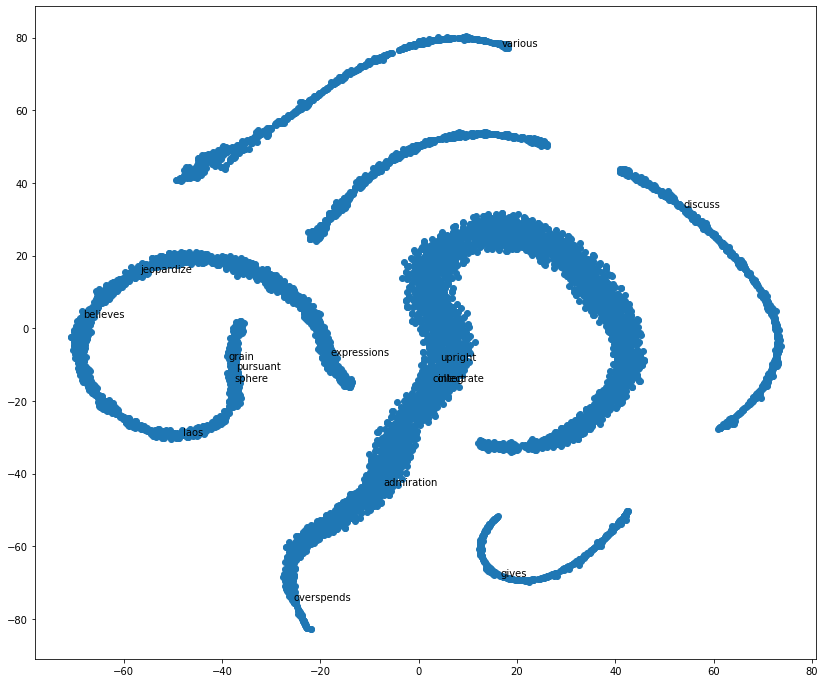

In [ ]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(scatter_df['x'], scatter_df['y'])

for word, pos in scatter_df.iloc[::500].iterrows():
    ax.annotate(word, pos)
plt.show()

In [ ]:
print(model.wv.most_similar(positive=["great","depression"], topn=1))
print(model.wv.most_similar(positive=["tax","cut"], topn=1))
print(model.wv.most_similar(positive=["civil","rights"], topn=1))
print(model.wv.most_similar(positive=["world","war"], topn=1))
print(model.wv.most_similar(positive=["cold","war"], topn=1))
print(model.wv.most_similar(positive=["economic","state"], topn=1))
print(model.wv.most_similar(positive=["budget","spending"], topn=1))
print(model.wv.most_similar(positive=["relations","foreign"], topn=1))
print(model.wv.most_similar(positive=["money","deficit"], topn=1))
print(model.wv.most_similar(positive=["financial","crisis"], topn=1))

[('change', 0.9998862743377686)]
[('growth', 0.9999234676361084)]
[('corporation', 0.9999158382415771)]
[('territory', 0.9998565316200256)]
[('cuba', 0.9998741745948792)]
[('hope', 0.9998948574066162)]
[('deficit', 0.999912679195404)]
[('industry', 0.9999188780784607)]
[('field', 0.9999273419380188)]
[('merely', 0.9999182224273682)]


In [ ]:
from gensim.models import Word2Vec
model1 = Word2Vec(df["new_clean_tokens"].sum(), size=100, sg=1,window=10, min_count=1, seed=1234)

In [ ]:
congress1 = model1.wv.most_similar(positive=['congress'], topn=10)
print(congress1)

[('legislation', 0.9975321888923645), ('recommendations', 0.9972800612449646), ('recommend', 0.9970940351486206), ('act', 0.99692702293396), ('commission', 0.9966657757759094), ('attention', 0.9966226816177368), ('report', 0.9965555667877197), ('take', 0.996527910232544), ('urge', 0.996441662311554), ('certain', 0.9964368343353271)]


In [ ]:
tax1 = model1.wv.most_similar(positive=['tax'], topn=10)
print(tax1)

[('income', 0.9987120032310486), ('taxation', 0.9986672401428223), ('unconstitutional', 0.9986382722854614), ('mean', 0.9986318349838257), ('nominally', 0.9986250996589661), ('accidents', 0.9986146092414856), ('desirable', 0.9985968470573425), ('difficult', 0.9985809922218323), ('fortune', 0.9985711574554443), ('reform', 0.9985671043395996)]


In [ ]:
defense1 = model1.wv.most_similar(positive=['defense'], topn=10)
print(defense1)

[('take', 0.9992667436599731), ('health', 0.9992265701293945), ('needed', 0.9992013573646545), ('balance', 0.9991481304168701), ('programs', 0.9991477727890015), ('full', 0.9991331100463867), ('commitment', 0.9991158246994019), ('secretary', 0.9991152286529541), ('costs', 0.9991070032119751), ('activities', 0.9990910291671753)]


In [ ]:
vocab1 = list(model1.wv.vocab)
X1 = model1[vocab1]


tsne1 = TSNE(n_components=2,random_state=1234)
X_tsne1 = tsne1.fit_transform(X1)

scatter_df1 = pd.DataFrame(X_tsne1, index=vocab1, columns=['x', 'y'])

C:\Users\Spencer Franklin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


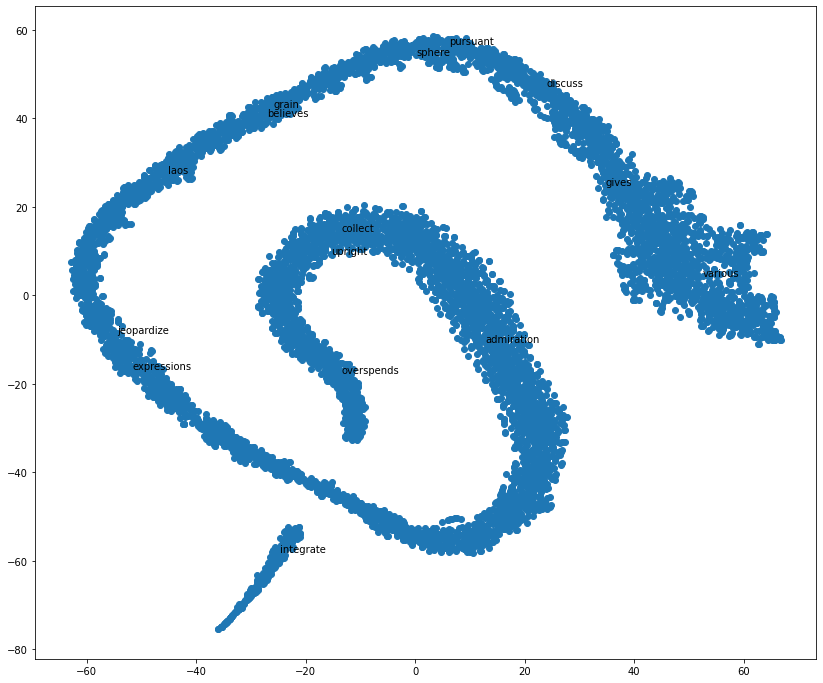

In [ ]:
fig1 = plt.figure(figsize=(14, 12))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.scatter(scatter_df1['x'], scatter_df1['y'])

for word, pos in scatter_df1.iloc[::500].iterrows():
    ax1.annotate(word, pos)

plt.show()

In [ ]:
print(model1.wv.most_similar(positive=["great","depression"], topn=1))
print(model1.wv.most_similar(positive=["tax","cut"], topn=1))
print(model1.wv.most_similar(positive=["civil","rights"], topn=1))
print(model1.wv.most_similar(positive=["world","war"], topn=1))
print(model1.wv.most_similar(positive=["cold","war"], topn=1))
print(model1.wv.most_similar(positive=["economic","state"], topn=1))
print(model1.wv.most_similar(positive=["budget","spending"], topn=1))
print(model1.wv.most_similar(positive=["relations","foreign"], topn=1))
print(model1.wv.most_similar(positive=["money","deficit"], topn=1))
print(model1.wv.most_similar(positive=["financial","crisis"], topn=1))

[('always', 0.9993653893470764)]
[('taxation', 0.9995428919792175)]
[('responsibility', 0.9994513988494873)]
[('peace', 0.9982988238334656)]
[('peoples', 0.9989755153656006)]
[('take', 0.9991549253463745)]
[('balance', 0.9996343851089478)]
[('questions', 0.9996604323387146)]
[('strive', 0.9996670484542847)]
[('achievement', 0.9997910261154175)]


We have found the word 10 closest word relationships to be pretty accurate mainly for how they are still pretty correlated and are used by politicians very closely. When we changed the dimension size and window we found that some of the closest words we same but at different positions and there were some new words entirely. The same goes for word relationships that changing the window size and dimension we got entirely different word relationships.  

For the topic selection on unseen documents was some interesting pickups as some unseen topics had displayed in all topics while otheres were condensed to only a few topics this maybe due to the unseen documents being shorter. 